In [ ]:
!pip install ucimlrepo

##Initial set up
X is the attributes
y is the target

for each type of classification I will create copies of X and y called df and target

In [ ]:
from pandas.core.reshape.merge import merge_ordered
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets
merged_df = pd.concat([X, y],  axis=1)
# metadata
#print(adult.metadata)

# variable information
print(adult.variables)
merged_df.head()

# here if they make greater than 50k we want it to be true or want and if not then false or zero
merged_df['income'] = merged_df['income'].replace({'>50K':0,'>50K.':0,'<=50K':1, '<=50K.':1})
merged_df['income']= merged_df['income'].astype(int) #check that all cases were covered such as the period after less than 50k

# Drop the selected features before numerization
merged_df = merged_df.drop(['education'], axis=1)#dropping education bc we have education level which is already numerical

#lumping together certain catergories
merged_df['native-country'] = (merged_df['native-country'] != "United-States").astype(int)
merged_df = merged_df.rename(columns={'native-country': 'native-country-US'})
merged_df.head()
merged_df.info()

#display column information
for column in X.columns:
  numNull = (X[column].isnull().sum()).astype(str)
  if(is_string_dtype(X[column])):
      numZero = "N/A"
      numNegative = "N/A"
  else:
      numZero = (X[column].eq(0).sum()).astype(str)
      numNegative = (X[column].lt(0).sum()).astype(str)

  print(column)
  print("   null values: \t"+(numNull))
  print("   num zeros values: \t"+(numZero))
  print("   negative values: \t"+(numNegative) +"\n")

merged_df = merged_df.dropna(how='any') # dropping null values as an option will comment out when I dont want to
print(merged_df.info())
print(merged_df.head())
y = merged_df.pop('income')
X = merged_df
print("\n final dataframes y then X before numerization")
print(y.head())
print("X dataframe")
print(X.head())


#trying to numericise the object Dtypes
columns_to_numericize = ['workclass', 'marital-status', 'occupation','relationship', 'race', 'sex'] # all categorical 'workclass','education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country'
for column in columns_to_numericize:
    X = pd.get_dummies(X, columns=[column])

# Drop the features where information gain was zero in the decision tree classifier
#X = X.drop(columns=['fnlwgt', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_Female', 'sex_Male', 'native-country_?', 'native-country_Cambodia', 'native-country_Canada', 'native-country_China', 'native-country_Columbia', 'native-country_Cuba', 'native-country_Dominican-Republic', 'native-country_Ecuador', 'native-country_El-Salvador', 'native-country_England', 'native-country_France', 'native-country_Germany', 'native-country_Greece', 'native-country_Guatemala', 'native-country_Haiti', 'native-country_Holand-Netherlands', 'native-country_Honduras', 'native-country_Hong', 'native-country_Hungary', 'native-country_India', 'native-country_Iran', 'native-country_Ireland', 'native-country_Italy', 'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos', 'native-country_Mexico', 'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru', 'native-country_Philippines', 'native-country_Poland', 'native-country_Portugal', 'native-country_Puerto-Rico', 'native-country_Scotland', 'native-country_Taiwan', 'native-country_Thailand', 'native-country_Trinadad&Tobago', 'native-country_United-States', 'native-country_Vietnam', 'native-country_Yugoslavia'])
print(X.info())

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

#creating train test split

In [ ]:

#X.head()
X.info() # shows only numerical types
y.info() # shows only numerical types
#train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47876 entries, 0 to 48841
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   47876 non-null  int64
 1   fnlwgt                                47876 non-null  int64
 2   education-num                         47876 non-null  int64
 3   capital-gain                          47876 non-null  int64
 4   capital-loss                          47876 non-null  int64
 5   hours-per-week                        47876 non-null  int64
 6   native-country-US                     47876 non-null  int64
 7   workclass_?                           47876 non-null  uint8
 8   workclass_Federal-gov                 47876 non-null  uint8
 9   workclass_Local-gov                   47876 non-null  uint8
 10  workclass_Never-worked                47876 non-null  uint8
 11  workclass_Private                     478

# Plain Decision Tree Classifier

In [ ]:
df = X_train
target = y_train
from sklearn import tree
plainTree = tree.DecisionTreeClassifier(max_depth=6)
plainTree.fit(df, target)

DecisionTreeClassifier(max_depth=6)

## Plain Decision Tree visualization

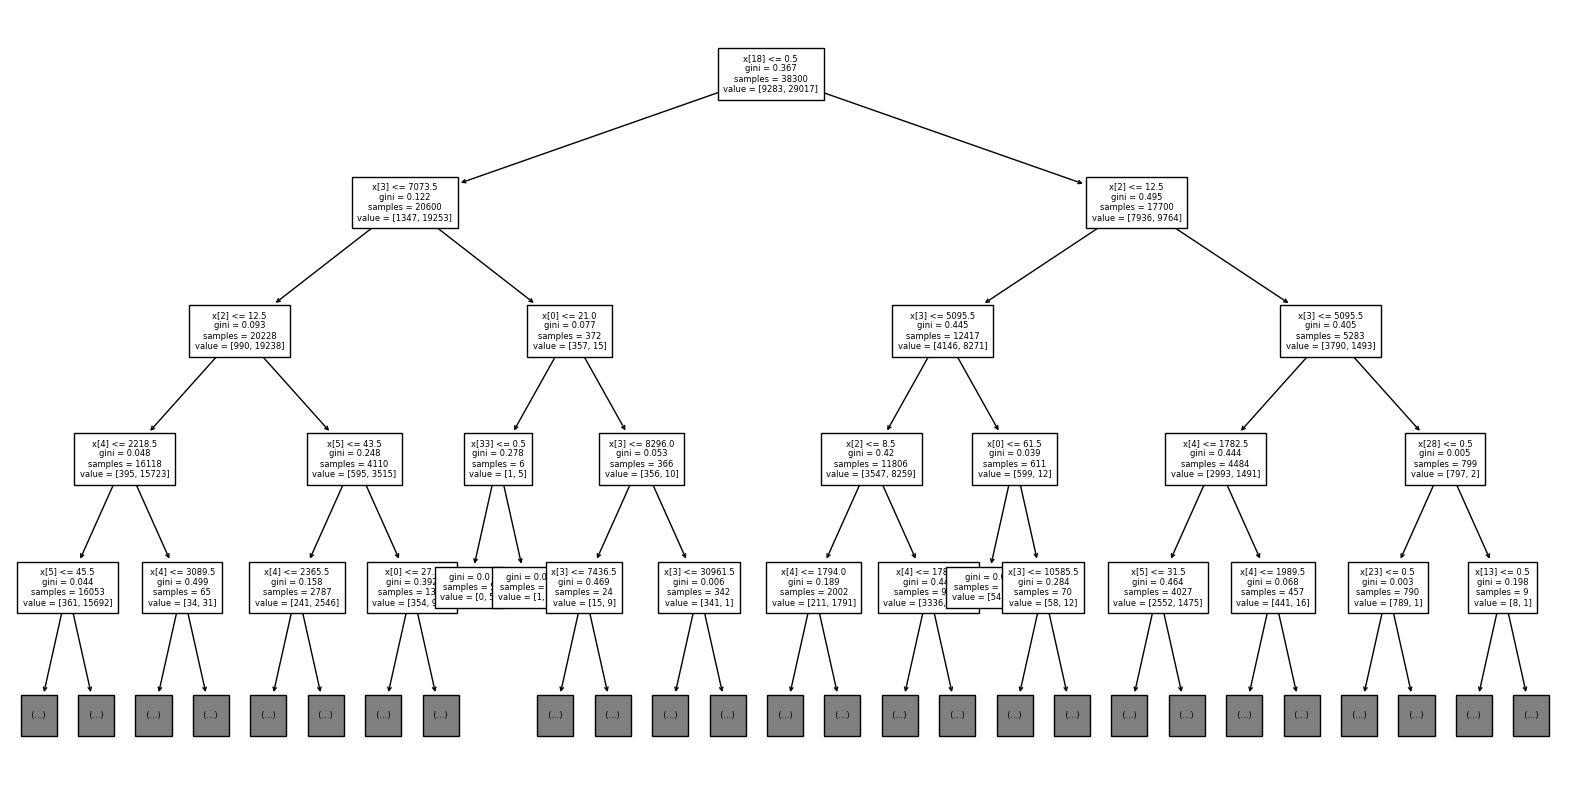

0
age: 0.03493492160084691
1
fnlwgt: 0.0
2
education-num: 0.2162914531863381
3
capital-gain: 0.2086709034865029
4
capital-loss: 0.07469361875771632
5
hours-per-week: 0.02024329183296661
6
native-country-US: 0.0
7
workclass_?: 0.0
8
workclass_Federal-gov: 0.0
9
workclass_Local-gov: 0.0
10
workclass_Never-worked: 0.0
11
workclass_Private: 0.0
12
workclass_Self-emp-inc: 0.0
13
workclass_Self-emp-not-inc: 0.00028101983383794094
14
workclass_State-gov: 0.0
15
workclass_Without-pay: 0.0
16
marital-status_Divorced: 0.0
17
marital-status_Married-AF-spouse: 0.0
18
marital-status_Married-civ-spouse: 0.44143630570452136
19
marital-status_Married-spouse-absent: 0.0
20
marital-status_Never-married: 0.0
21
marital-status_Separated: 0.0
22
marital-status_Widowed: 0.0
23
occupation_?: 2.0676301065609288e-05
24
occupation_Adm-clerical: 0.0
25
occupation_Armed-Forces: 0.0
26
occupation_Craft-repair: 0.0
27
occupation_Exec-managerial: 0.0
28
occupation_Farming-fishing: 3.3944950742945145e-05
29
occupatio

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# show the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(plainTree, max_depth=4, fontsize=6) # larger depths taking too long to visualize or too small to see
plt.show()

# lets look at the features with the most information gain
feature_importance = plainTree.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))


#Print the feature importance
count = 0
for feature, importance in feature_importance_dict.items():
    print(count)
    print(f'{feature}: {importance}')
    count +=1

# # convert the values with zero information gain into list we can drop from X
# zero_value_keys = [key for key, value in feature_importance_dict.items() if value == 0.0]

# print(zero_value_keys)



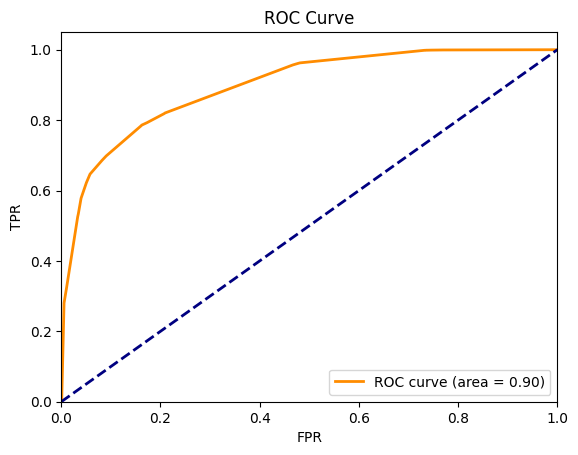

In [ ]:
#plotting the RoC curve
y_score = plainTree.predict_proba(X_test)[:, 1]

# Computing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

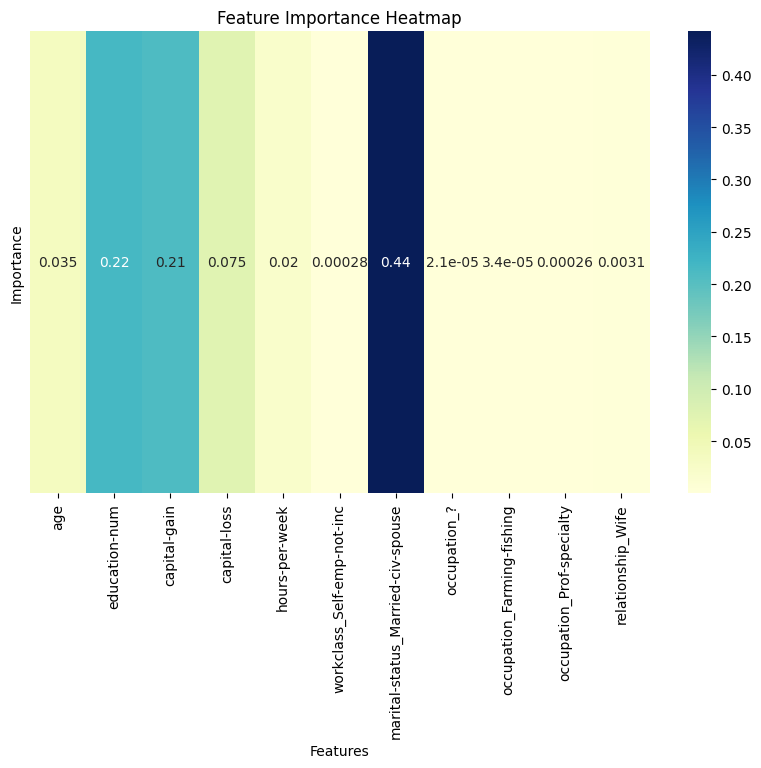

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
filtered_feature_importance = {key: value for key, value in feature_importance_dict.items() if value > 0}
features = list(filtered_feature_importance.keys())
importance = list(filtered_feature_importance.values())
data = np.array(importance).reshape(1, -1)

#creating a heatmap of the features infogain
plt.figure(figsize=(10, 6))
sns.heatmap(data, cmap="YlGnBu", annot=True, xticklabels=features, yticklabels=False)
plt.title("Feature Importance Heatmap")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

#take aways from plain decision tree
##most important features are in order
 - marital status
 - level of education
 - capital gain
 - capital loss
 - age
 - hours-per-week

# Analysis of Plain Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = plainTree.predict(X_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)


0.8544277360066834
              precision    recall  f1-score   support

           0       0.81      0.52      0.64      2330
           1       0.86      0.96      0.91      7246

    accuracy                           0.85      9576
   macro avg       0.84      0.74      0.77      9576
weighted avg       0.85      0.85      0.84      9576



# metrics of the plain decision tree
####**depth=6, all features, no null values**

accuracy = .85165

####**depth=6, feature with info gain>0, no null values**
accuracy = .85165


####**depth=6, features with custom selection, no null values**
accuracy = .854323


####**depth=12, all features, no null values**
accuracy = .84987

####**depth=20, all features, no null values**
accuracy = .83003

#values in line with what UC Irvine say is average

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandForest = RandomForestClassifier(max_depth=20) #n_estimators=500, max_depth=20, min_samples_leaf=5
RandForest.fit(X_train, y_train)
y_pred = RandForest.predict(X_test)

#Random Forest Classifier Visualization

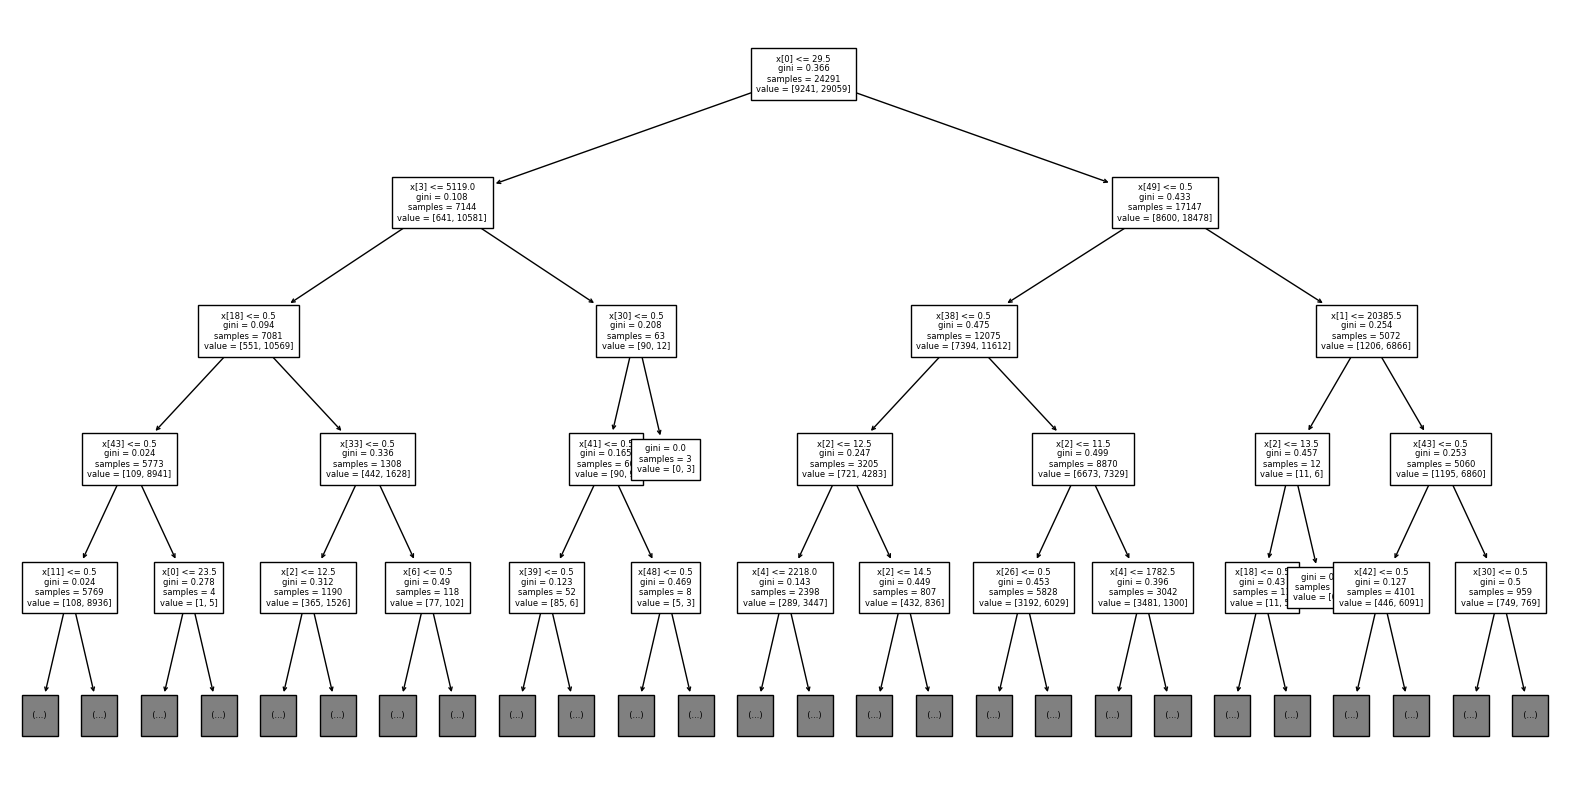

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(RandForest.estimators_[0], max_depth=4, fontsize=6) # larger depths taking too long to visualize or too small to see
plt.show()

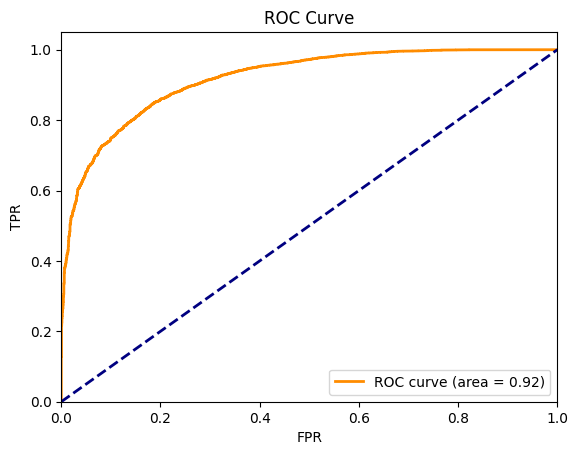

In [ ]:
#plotting the RoC curve
y_score = RandForest.predict_proba(X_test)[:, 1]

# Computing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Analysis

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = RandForest.predict(X_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

0.8665413533834586
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      2330
           1       0.88      0.95      0.92      7246

    accuracy                           0.87      9576
   macro avg       0.84      0.78      0.80      9576
weighted avg       0.86      0.87      0.86      9576



# metrics of the Random Forest Classifier
n_estimators not set and defaults to 100
####**depth=6, all features, no null values**
accuracy = .83927

####**depth=12, all features, no null values**
accuracy = .85638

####**depth=20, all features, no null values**
accuracy = .8614
####**depth=20, features infogain>0 on decision tree, no null values**
accuracy = .85417
####**depth=20, custom features, no null values**
accuracy = .8651
####**no settings, all features, no null values**
accuracy = .85008

####**no settings, features infogain>0 on decision tree, no null values**
accuracy = .84178

#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=200)
AdaBoost.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)

#AdaBoost visualization

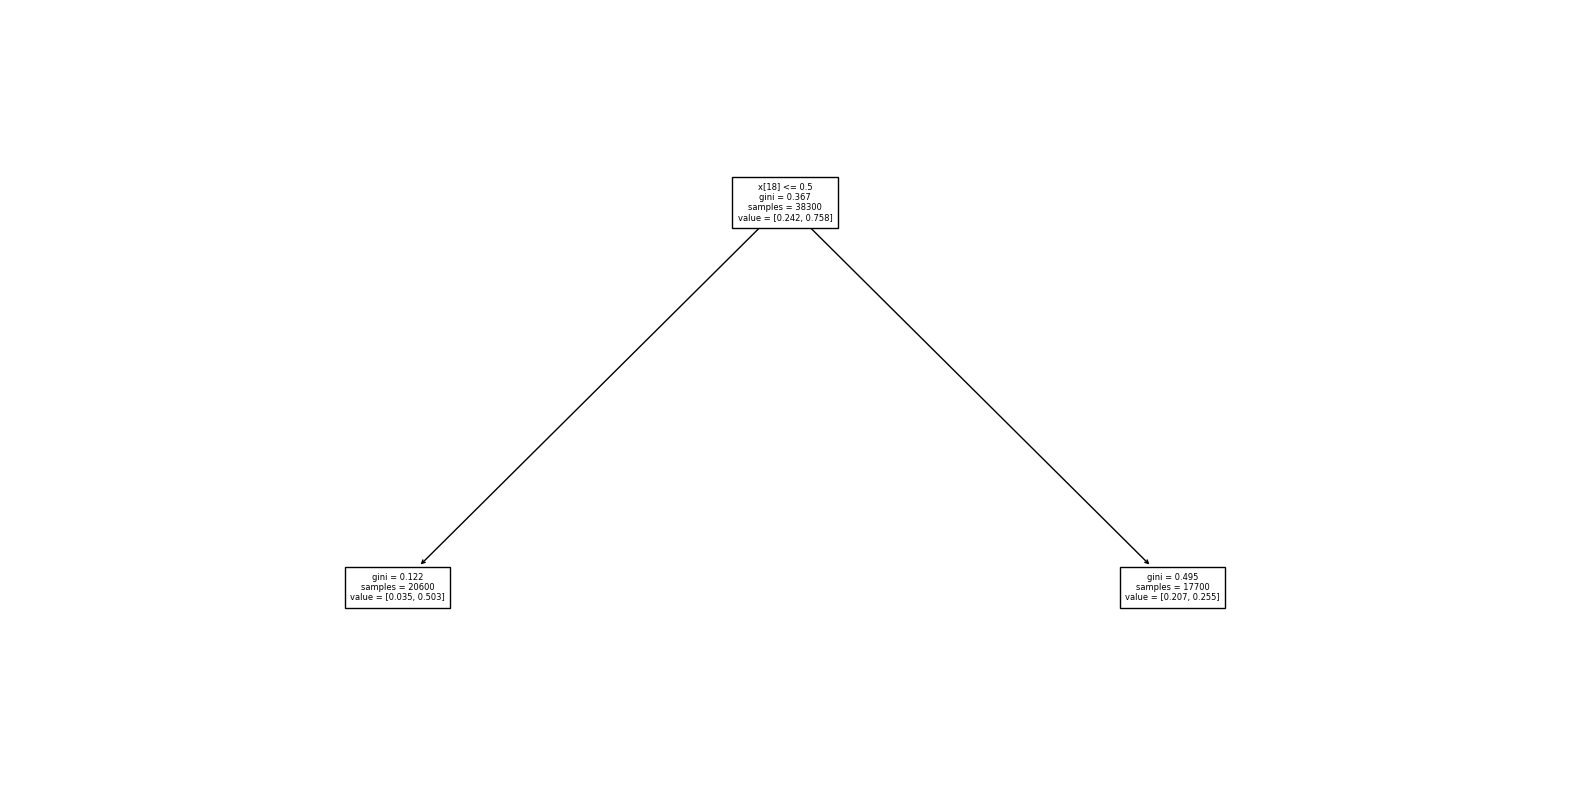

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(AdaBoost.estimators_[0],  fontsize=6)
plt.show()

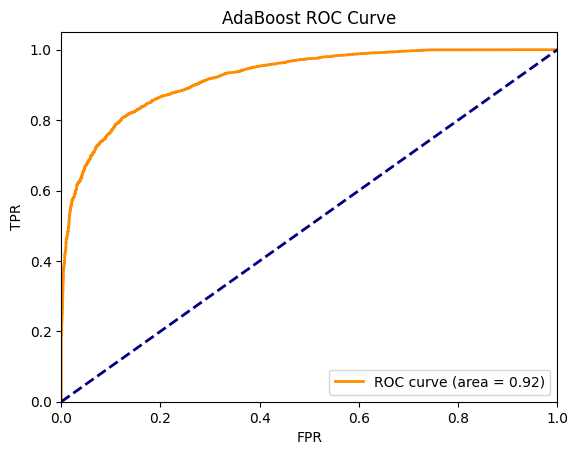

In [ ]:
#plotting the RoC curve
y_score = AdaBoost.predict_proba(X_test)[:, 1]

# Computing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AdaBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

0.8666457811194653
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2330
           1       0.89      0.94      0.91      7246

    accuracy                           0.87      9576
   macro avg       0.83      0.79      0.81      9576
weighted avg       0.86      0.87      0.86      9576



#AdaBoost metrics
####**no settings, all features, no null values**
accuracy = .85827
####**no settings, all features, no null values**
accuracy = .85827
####**no settings,features with infogain>0 on decision tree, no null values**
accuracy = .85532
####**no setting, custom features, no null values**
accuracy = .8605
####**estimators=200, all features, no null values**
accuracy = .8656
####**estimators=200, custom features, no null values**
accuracy = .8666
####**estimators=200,features with infogain>0 on decision tree, no null values**
accuracy = .8593


#XGBoost

In [ ]:
import xgboost as xgb
XGBoost = xgb.XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=6)
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)


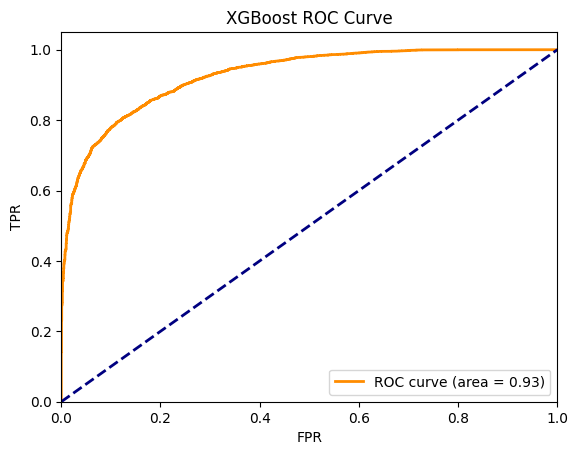

In [ ]:
#plotting the RoC curve
y_score = XGBoost.predict_proba(X_test)[:, 1]

# Computing the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# the following code is working on tuning the hyperparamater
this was process was taken from machinelearning mastery.com and specified for this XGBoost model. This approach uses a grid search technique that takes awhile so it has been commented out

In [ ]:
# playing around with a XGBoost tuning method from https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# model = xgb.XGBClassifier()
# n_estimators = [ 100, 110, 125, 175, 225, 270, 300]
# max_depth = [ 2,3,5,6]

# learning_rate = [  .15, .18, .20, .22]
# print(max_depth)
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate) #, learning_rate=learning_rate
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
# grid_result = grid_search.fit(X_test, y_test)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize results
# from the inital n_estimators = [50, 100, 150, 200] and max_depth = [2, 4, 6, 8] we got n_estimators = 200 and max_depth =2 so adding more options based on that
# second round resulted in max_depth = 2 is still optimal and n_estimators went up to 220 now adding learning rate
# result from round three {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 230}
# result from round four Best: -0.291616 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}
# result from round five Best: -0.291616 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}
# switching the scoring to accuracy
# Best: 0.870926 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}

[2, 3, 5, 6]
Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best: 0.870926 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}


0.863095 (0.009338) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100}
0.863930 (0.008890) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 110}
0.864974 (0.008496) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 125}
0.867793 (0.009774) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 175}
0.869046 (0.009746) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 225}
0.869882 (0.009359) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 270}
0.869256 (0.009241) with: {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 300}
0.867375 (0.010011) with: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100}
0.868419 (0.010110) with: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 110}
0.867270 (0.010546) with: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 125}
0.868420 (0.010028) with: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 175}
0.867794 (0.009177) with: {'learning_rate':

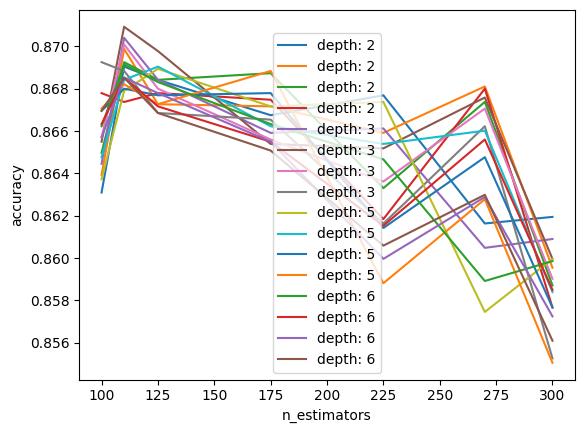

In [ ]:

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) with: %r" % (mean, stdev, param))
# # plot results
# scores = np.array(means).reshape(len(max_depth), len(n_estimators), len(learning_rate))
# for i, value in enumerate(max_depth):
#     plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
# plt.legend()
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.savefig('n_estimators_vs_max_depth.png')

# summarize results
- from the inital n_estimators = [50, 100, 150, 200] and max_depth = [2, 4, 6, 8] we got n_estimators = 200 and max_depth =2 so adding more options based on that
- second round resulted in max_depth = 2 is still optimal and n_estimators went up to 220 now adding learning rate
-result from round three {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 230}
-result from round four Best: -0.291616 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}
- result from round five Best: -0.291616 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}
 ###switching the scoring to accuracy
 - Best: 0.870926 using {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}

#takeaway

it seems that the values peak at 100 n_estimators with a depth of 6 and learning rate of 1.8 when done by hand and when using the grid approach it peaks at the following

0.870926 (0.009392) with: {'learning_rate': 0.18, 'max_depth': 2, 'n_estimators': 270}

#XGBoost visualization

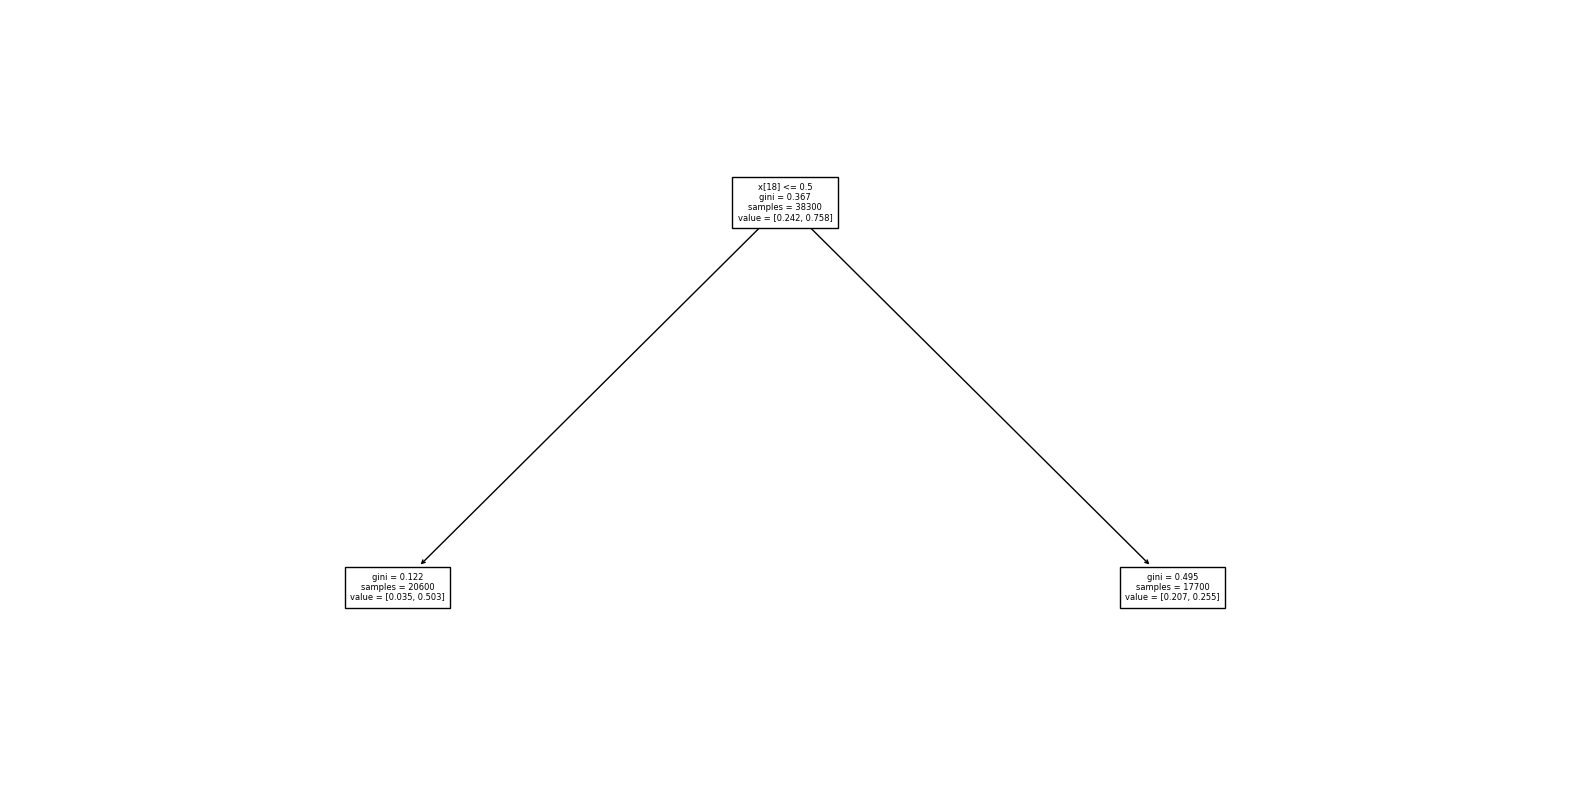

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(AdaBoost.estimators_[0],  fontsize=6)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

0.8743734335839599
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      2330
           1       0.90      0.94      0.92      7246

    accuracy                           0.87      9576
   macro avg       0.84      0.80      0.82      9576
weighted avg       0.87      0.87      0.87      9576



#XGBoost Metrics
####**no setting, custom features, no null values**
accuracy = .8721
####**learning_rate=.2, custom features, no null values**
accuracy = .8744


#Tensorflow classify structured data with preprocessing layers

In [ ]:
#trying tensorflow classification steps
#need to add reloading of clean dataset/df
dataframe = merged_df
dataframe['target']= y

train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)

[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['age'])
print('A batch of targets:', label_batch )

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)



  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))


test_type_col = train_features['occupation']
test_type_layer = get_category_encoding_layer(name='occupation',
                                              dataset=train_ds,
                                              dtype='string')
test_type_layer(test_type_col)


batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


all_inputs = []
encoded_features = []

# Numerical features.
for header in ['capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)


age_col = tf.keras.Input(shape=(1,), name='age', dtype='int64')

encoding_layer = get_category_encoding_layer(name='age',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_age_col = encoding_layer(age_col)
all_inputs.append(age_col)
encoded_features.append(encoded_age_col)

categorical_cols = pd.DataFrame()
for column in X.columns:
  numNull = (X[column].isnull().sum()).astype(str)
  if(is_string_dtype(X[column])):
      categorical_cols[column] = X[column]



for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)


all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)



38300 training examples
4788 validation examples
4788 test examples


<ipython-input-6-dad84194fcf8>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


Every feature: ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country-US', 'target']
A batch of ages: tf.Tensor(
[[21]
 [25]
 [42]
 [27]
 [31]], shape=(5, 1), dtype=int64)
A batch of targets: tf.Tensor([1 1 1 1 1], shape=(5,), dtype=int64)


<ipython-input-6-dad84194fcf8>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-6-dad84194fcf8>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-6-dad84194fcf8>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


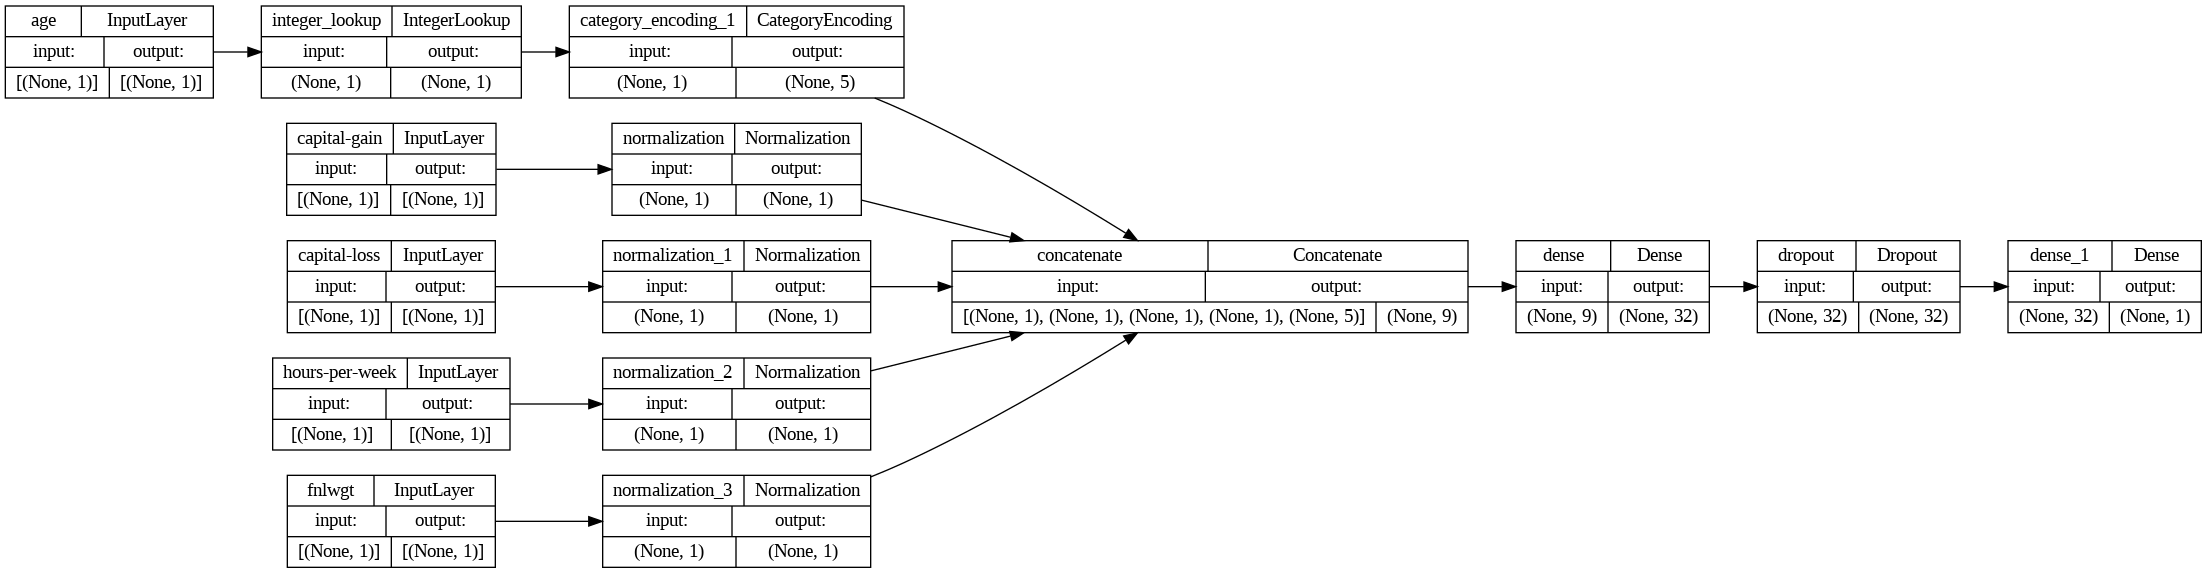

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country-US', 'target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


150/150 [==============================] - 9s 10ms/step - loss: 0.5581 - accuracy: 0.6698 - val_loss: 0.4943 - val_accuracy: 0.7855
Epoch 2/30
150/150 [==============================] - 1s 7ms/step - loss: 0.5055 - accuracy: 0.7658 - val_loss: 0.4751 - val_accuracy: 0.7876
Epoch 3/30
150/150 [==============================] - 1s 7ms/step - loss: 0.4865 - accuracy: 0.7742 - val_loss: 0.4668 - val_accuracy: 0.7884
Epoch 4/30
150/150 [==============================] - 1s 7ms/step - loss: 0.4808 - accuracy: 0.7770 - val_loss: 0.4637 - val_accuracy: 0.7907
Epoch 5/30
150/150 [==============================] - 1s 7ms/step - loss: 0.4771 - accuracy: 0.7784 - val_loss: 0.4618 - val_accuracy: 0.7903
Epoch 6/30
150/150 [==============================] - 1s 7ms/step - loss: 0.4715 - accuracy: 0.7794 - val_loss: 0.4594 - val_accuracy: 0.7920
Epoch 7/30
150/150 [==============================] - 2s 9ms/step - loss: 0.4691 - accuracy: 0.7830 - val_loss: 0.4580 - val_accuracy: 0.7957
Epoch 8/30
150/1

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

model.save('50k_classifier')
reloaded_model = tf.keras.models.load_model('50k_classifier')

19/19 [==============================] - 0s 8ms/step - loss: 0.4736 - accuracy: 0.7895
Accuracy 0.7894737124443054


In [ ]:

sample = {
    'capital-gain': 50,
    'capital-loss': 3,
    'hours-per-week': 40,
    'fnlwgt': 4,
    'age': 25,
    'workclass': 'Black',
    'education': 'White',
    'marital-status': 'Never-married',
    'occupation': 'Prof-specialty',
    'relationship': 'Unmarried',
    'race': 'White',
    'sex': 'Male',
    'native-country': 'United-States'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = reloaded_model.predict(input_dict)
prob = tf.nn.sigmoid(predictions[0])

print(
    "This individual has a probability of making more than 50k of ." % (100 * prob)
)

1/1 [==============================] - 0s 146ms/step
This individual has a probability of making more than 50k of .


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] which did not match any model input. They will be ignored by the model.


#takeaways
I ran out of time to fine tune or dig too deep into this one but will be interesting for future projects